**Task1: Normalisation**

In [1]:
import tensorflow as tf #TensorFlow is an open-source machine learning framework for building and deploying ML models efficiently.
import numpy as np #NumPy is a Python library for numerical computing, providing support for arrays, mathematical functions, and efficient operations on large datasets.
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images_flat = train_images.reshape(-1)

mean = np.mean(train_images_flat)
std = np.std(train_images_flat)

print(f"Mean: {mean}, Standard Deviation: {std}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Mean: 33.318421449829934, Standard Deviation: 78.56748998339798


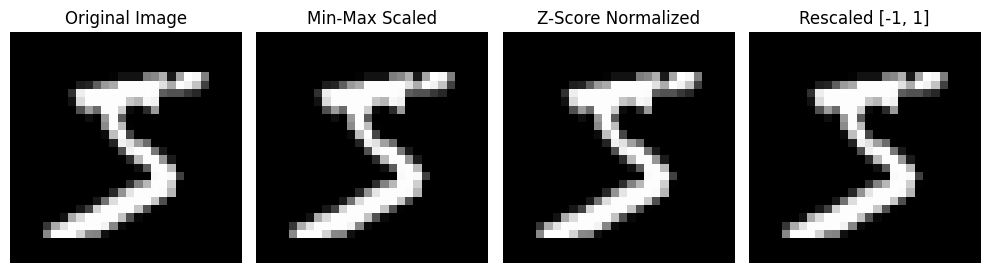

In [2]:
# Normlization techniques
#min-max scaling(range[0,1])
def min_max_scaling(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))


#Z-score pixelization(standarlizing pixels)
def z_score_normalization(image):
    return (image - mean) / std

#rescaling[-1,1]
def rescale_minus_one_to_one(image):
    return (image / 127.5) - 1


#visualization

sample_image = train_images[0]


min_max_image = min_max_scaling(sample_image)
z_score_image = z_score_normalization(sample_image)
rescaled_image = rescale_minus_one_to_one(sample_image)


plt.figure(figsize=(10, 6))

titles = ["Original Image", "Min-Max Scaled", "Z-Score Normalized", "Rescaled [-1, 1]"]
images = [sample_image, min_max_image, z_score_image, rescaled_image]

for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()



**2.Augumentation Strategies**




In [3]:
#importing libraries and loading the data
import tensorflow as tf
import matplotlib.pyplot as plt # used to plot matrices.


(train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()
sample_image = train_images[0]
sample_image = tf.expand_dims(sample_image, axis=-1)


In [4]:
 #Defining augumentation functions
 #Random Rotation
def random_rotation(image):
    return tf.keras.preprocessing.image.random_rotation(image.numpy(), 30)


# Random Zoom
def random_zoom(image):
    zoom_factor = 0.8
    return tf.keras.preprocessing.image.random_zoom(image.numpy(), (zoom_factor, zoom_factor))


# Random Flip
def random_flip(image):
    return tf.image.random_flip_left_right(image)


#Random Brightness
def random_brightness(image):
    return tf.image.adjust_brightness(image, delta=0.2)


#Random Shear
#TensorFlow does not directly support shear transformations, so this requires a custom function:
import numpy as np
from tensorflow.keras.preprocessing.image import apply_affine_transform

def random_shear(image):
    shear = 20  # Degrees
    return apply_affine_transform(image.numpy(), shear=shear)


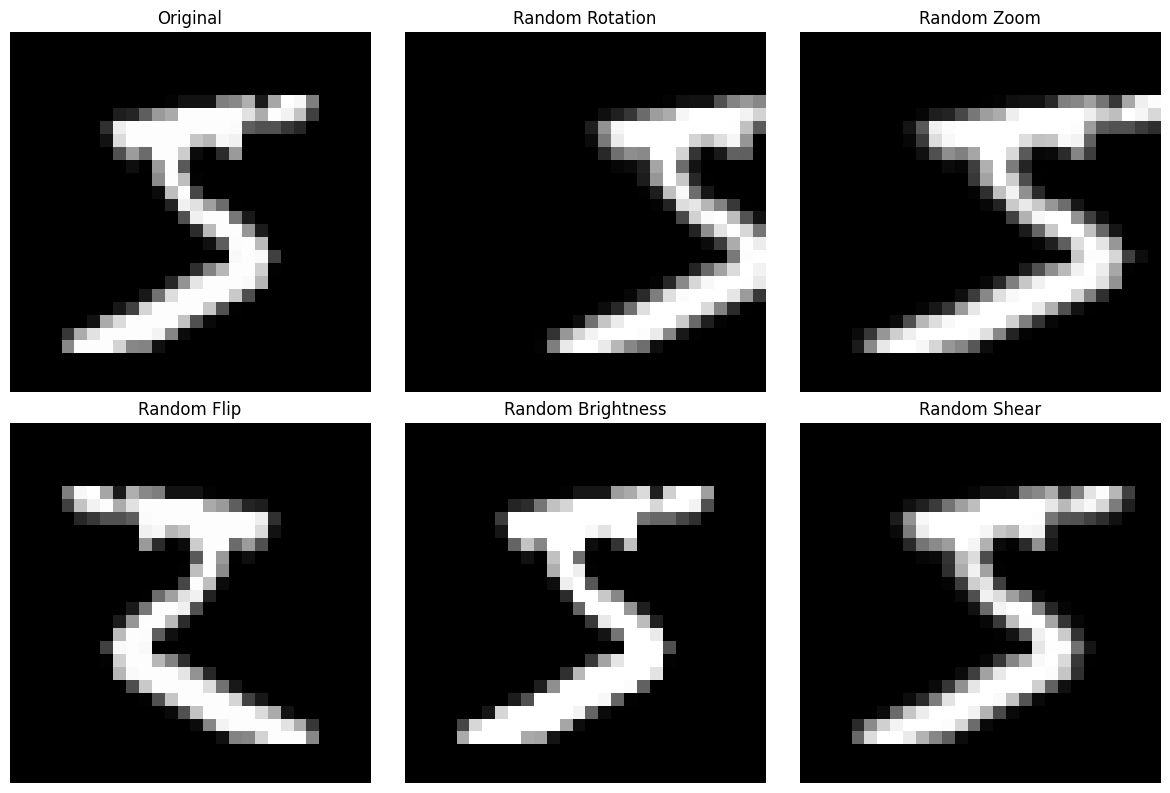

In [5]:
#Applying Augumentations and visualizing
# Define augmentation methods
augmentation_methods = {
    "Original": lambda x: x,
    "Random Rotation": random_rotation,
    "Random Zoom": random_zoom,
    "Random Flip": random_flip,
    "Random Brightness": random_brightness,
    "Random Shear": random_shear,
}


plt.figure(figsize=(12, 8))

for i, (title, aug_fn) in enumerate(augmentation_methods.items()):
    augmented_image = aug_fn(sample_image)
    plt.subplot(2, 3, i + 1)
    plt.imshow(tf.squeeze(augmented_image), cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.tight_layout()
plt.show()


**Implementation of convolution Techniques in Pytorch**


In [6]:
# creating input and kernel tensor
import torch #It is core PyTorch library, used for tensor operations, creating models and performing computations on GPUs.

# Input tensor
input_tensor = torch.tensor([[1, 1, 1, 0, 0, 0],
                            [1, 1, 1, 0, 0, 0],
                            [1, 1, 1, 0, 0, 0],
                            [1, 1, 1, 0, 0, 0],
                            [1, 1, 1, 0, 0, 0],
                            [1, 1, 1, 0, 0, 0]])

# Kernel tensor (for detecting vertical edges)
kernel = torch.tensor([[-1, 0, 1],
                        [-1, 0, 1],
                        [-1, 0, 1]])

In [7]:
#Convolution with different strides
# Convolution with stride 1
output_stride1 = torch.nn.functional.conv2d(input_tensor.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), stride=1)

# Convolution with stride 2
output_stride2 = torch.nn.functional.conv2d(input_tensor.unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0), stride=2)
print(output_stride1)#The output will be a 4x4 tensor. Produces a detailed output, capturing fine-grained features.
print(output_stride2)#The output will be a 2x2 tensor.Produces a coarser output, reducing computational cost but potentially losing some information.]

tensor([[[[ 0, -3, -3,  0],
          [ 0, -3, -3,  0],
          [ 0, -3, -3,  0],
          [ 0, -3, -3,  0]]]])
tensor([[[[ 0, -3],
          [ 0, -3]]]])


In [8]:
#Best practices to consider when implementing convolution in PyTorch
# Leverage PyTorch's  Module
import torch.nn as nn

# Define the convolutional layer
conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)
'''
Batch Processing
PyTorch's convolutional layers are designed to handle batches of images efficiently.
Make sure that  your input tensor has the batch dimension as the first dimension.
'''
#Assuming a batch of 6 images
input_tensor = torch.randn(6, 1, 6, 6)  # Batch, Channel, Height, Width
output = conv_layer(input_tensor)
if torch.cuda.is_available():#Here we verifying the GPU Availability
    device = torch.device("cuda")
    input_tensor = input_tensor.to(device)
    conv_layer = conv_layer.to(device)
print(output)#You'll get an output tensor of the same shape: (16, 1, 6, 6).
print(conv_layer)

tensor([[[[ 0.3337,  0.2687,  0.8217, -0.0482,  0.4872, -0.4865],
          [ 0.5598, -0.9378, -0.5194, -0.0027, -0.4905,  1.5306],
          [ 0.8666, -0.9422,  0.3985,  0.8355, -0.6398, -1.3631],
          [ 0.9807, -0.4676,  0.0517,  1.6073,  1.1953,  1.1918],
          [-0.3258,  0.8561, -0.8606,  0.9698, -0.9327, -1.6313],
          [-0.6755, -0.1056,  0.6661, -0.2941,  0.1486,  1.3875]]],


        [[[ 0.0154, -0.0070, -0.0520,  0.0861,  0.1805,  0.2887],
          [-0.4149,  1.6184,  0.2121,  0.0713, -1.0615,  0.9896],
          [-0.5257,  0.6641, -0.0318, -0.1577,  0.5512, -0.1621],
          [ 0.2101, -0.2707,  0.8936,  0.4657, -0.6902,  0.7663],
          [ 0.2783,  0.6137, -0.1972, -0.0231, -0.4074,  0.8696],
          [-0.5029,  0.3694, -0.1301,  1.4059, -0.7304,  0.0705]]],


        [[[ 0.3050, -0.0141, -0.4585,  1.1930, -0.0230,  0.3850],
          [ 0.3533,  1.2336,  0.2719,  0.0775,  1.0978, -1.5403],
          [ 0.3142, -0.1342,  0.8723,  0.2594,  0.1675,  0.8500],
  

**Building a Simple CNN in Pytorch**

In [9]:
#importing libraries
import torch #It is core PyTorch library, used for tensor operations, creating models and performing computations on GPUs.
import torch.nn as nn # It Contains modules, layers, and functions to build neural networks (e.g., nn.Linear, nn.ReLU, etc.).
import torch.optim as optim #Provides optimization algorithms to update model parameters during training.
from torchvision import datasets, transforms
from torch.utils.data import DataLoader # A utility to handle data batching and shuffling during training and testing.


In [10]:
#Defining a CNN model
# The model i am defining here is a simple CNN
# Simple CNN is a straightforward convolutional neural network designed for image classification tasks, such as the MNIST dataset.
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) #Max pooling
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU() # ReLU (Rectified Linear Unit) is an activation function that outputs the input if it's positive and 0 otherwise.

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 7 * 7)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [11]:
# preparing data
# we are giving MNIST data
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(), # Converts image data to PyTorch tensors and scales pixel values from [0, 255] to [0, 1].
    transforms.Normalize((0.5,), (0.5,))  # Normalize grayscale images
])

train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True) #torchvision.datasets.MNIST,downloads and loads the MNIST dataset
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=True)  # DataLoader Splits the dataset into small batches of size 64 for training
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 506kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.61MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.09MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [12]:
# Initialize Model, Loss, and Optimizer
model = SimpleCNN() # Instantiate the model, loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 7 #epochs represent the number of times(7) the model sees the entire dataset during training.
for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images) # Forward pass
        loss = criterion(outputs, labels)
         # Backward pass and optimization
        loss.backward()
        optimizer.step()
        #Calculate statistics
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.2061
Epoch 2, Loss: 0.0543
Epoch 3, Loss: 0.0391
Epoch 4, Loss: 0.0296
Epoch 5, Loss: 0.0227
Epoch 6, Loss: 0.0184
Epoch 7, Loss: 0.0148


In [13]:
# Evaluating the model
model.eval() # It is used  to inform PyTorch that the model is in evaluation mode.
correct = 0
total = 0
with torch.no_grad(): # It is used to turn off gradient calculations.
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")


Accuracy: 98.76%


In [16]:
from PIL import Image # PIL import Image statement imports the Image module from the Python Imaging Library (PIL).
def test_single_img(img_path ,model):
  img = Image.open(img_path)
  img  = transform(img).unsqueeze(0)
  model.eval() # model.eval() function tells that model is in evalution state.

  with torch.no_grad():
    outputs = model(img)
    _,predicted = torch.max(outputs,1)
  return predicted.item()




In [36]:
# Uploading images from computer
from google.colab import files
uploaded = files.upload()

Saving ML_6.png to ML_6.png


In [33]:
import torch

def test_single_img(input_tensor, model):
    # Ensure the model is in evaluation mode
    model.eval()

    # Perform prediction
    with torch.no_grad():
        output = model(input_tensor)  # Pass the tensor directly to the model
        predicted_class = output.argmax(dim=1).item()  # Get the class with the highest score
        return predicted_class


In [34]:
from PIL import Image
import torch
from torchvision import transforms

# Preprocessing function
def preprocess_image(img_path):
    # Open the image file
    img = Image.open(img_path)

    # Convert to grayscale and preprocess
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Convert to 1 channel
        transforms.Resize((28, 28)),                 # Resize to 28x28
        transforms.ToTensor()                        # Convert to tensor
    ])
    return transform(img).unsqueeze(0)  # Add batch dimension

# Define a dummy model for testing (replace with your actual model)
class DummyModel(torch.nn.Module):
    def __init__(self):
        super(DummyModel, self).__init__()
        self.fc = torch.nn.Linear(28 * 28, 10)  # Example model

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.fc(x)

# Instantiate model
model = DummyModel()

# Path to your image
img_path = "/content/ML_6.png"

# Preprocess the image
input_tensor = preprocess_image(img_path)
print(f"Input tensor shape: {input_tensor.shape}")

# Test prediction
try:
    predicted_class = test_single_img(input_tensor, model)
    print(f"Predicted class: {predicted_class}")
except Exception as e:
    print(f"Error in prediction: {e}")


Input tensor shape: torch.Size([1, 1, 28, 28])
Predicted class: 6


Accuracy: 8.73%


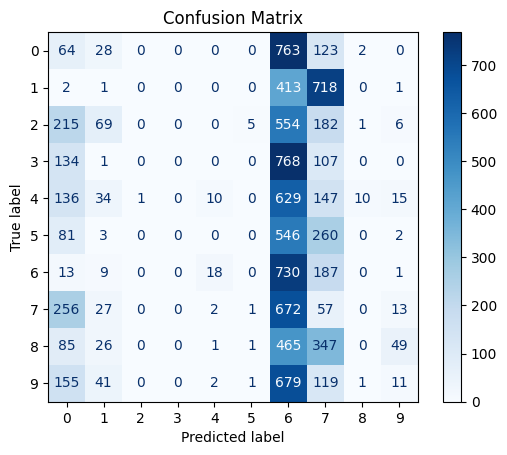

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #
import matplotlib.pyplot as plt
import torch

# Switch model to evaluation mode
model.eval()
correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store predictions and labels
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Print accuracy
print(f"Accuracy: {100 * correct / total:.2f}%")

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))  # Adjust 'range(10)' for class labels
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


**MLP using Pytorch**

In [37]:
import torch #It is core PyTorch library, used for tensor operations, creating models and performing computations on GPUs.
import torch.nn as nn # It Contains modules, layers, and functions to build neural networks (e.g., nn.Linear, nn.ReLU, etc.).
import torch.optim as optim #Provides optimization algorithms to update model parameters during training.
from torch.utils.data import DataLoader # A utility to handle data batching and shuffling during training and testing.
import torchvision # A library that includes pre-trained models, datasets, and utility functions for image data.
import torchvision.transforms as transforms # Functions to preprocess and augment images, such as resizing, normalizing, and converting to tensors.



# transform is used to Chains multiple transformations together.
transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                              transforms.Resize((28,28)),
                              transforms.ToTensor(), # Converts image data to PyTorch tensors and scales pixel values from [0, 255] to [0, 1].
                              transforms.Normalize((0.5),(0.5))]) # Normalize normalizes image data.

In [38]:
trainset=torchvision.datasets.MNIST(root="/data",train=True,download=True,transform=transform) #torchvision.datasets.MNIST,downloads and loads the MNIST dataset
testset=torchvision.datasets.MNIST(root="/data",train=False,download=True,transform=transform)
trainloader=DataLoader(trainset,batch_size=64,shuffle=True) # DataLoader Splits the dataset into small batches of size 64 for training
testloader=DataLoader(testset,batch_size=64,shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 519kB/s]


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.52MB/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.68MB/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



In [39]:
class MLP(nn.Module): # creating a class MLP
    def __init__(self):
        super(MLP, self).__init__()
        # Original layers
        self.fc1 = nn.Linear(28*28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 64)    # Hidden layer 1
        self.fc3 = nn.Linear(64, 32)     # Hidden layer 2
        self.fc4 = nn.Linear(32, 10)     # Output layer

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Flatten input
        x = x.view(-1, 28*28)

        # Pass through layers with ReLU activations
        x = self.relu(self.fc1(x))  # First layer + ReLU
        x = self.relu(self.fc2(x))  # Second layer + ReLU
        x = self.relu(self.fc3(x))  # Third layer + ReLU
        x = self.fc4(x)             # Output layer (no activation for logits)

        return x


In [40]:
model = MLP()# Instantiate the model, loss function, and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

# Training loop with increased epochs
epochs = 5
for epoch in range(epochs):
  model.train() # Set model to training mode
  running_loss = 0.0
  correct =0
  total =0
  for inputs, labels in trainloader:
    optimizer.zero_grad()
    outputs = model(inputs)    # Forward pass
    loss = criterion(outputs ,labels )
        # Backward pass and optimization
    loss.backward()
    optimizer.step()
 # Calculate statistics
    running_loss += loss.item()
    _,predicted = torch.max(outputs,1)
    total +=labels.size(0)
    correct +=(predicted ==labels).sum().item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)} , Accuracy: {100*correct/total}")

Epoch 1/5, Loss: 0.433435383207127 , Accuracy: 86.795
Epoch 2/5, Loss: 0.19478376711339457 , Accuracy: 94.09833333333333
Epoch 3/5, Loss: 0.14206929555011868 , Accuracy: 95.65166666666667
Epoch 4/5, Loss: 0.11225188830430542 , Accuracy: 96.52166666666666
Epoch 5/5, Loss: 0.0982845647107643 , Accuracy: 96.93166666666667


In [41]:
model.eval() # Set model to evaluation mode
correct =0
total =0
act_labels =torch.tensor([])
model_predicted =torch.tensor([])

with torch.no_grad():
  for inputs, labels in testloader:
    outputs =model(inputs)
    act_labels = torch.cat((act_labels ,labels ) ,dim =0)
    _, predicted = torch.max(outputs,1)
    model_predicted = torch.cat((model_predicted ,predicted),dim=0 )
    total +=labels.size(0)
    correct += (predicted ==labels).sum().item()
print(f"Test Accuracy: {100*correct/total:.2f}")

from PIL import Image #from PIL import Image statement imports the Image module from the Python Imaging Library (PIL)
def test_single_img(img_path ,model):
  img = Image.open(img_path)
  img  = transform(img).unsqueeze(0)
  model.eval()

  with torch.no_grad():
    outputs = model(img)
    _,predicted = torch.max(outputs,1)
  return predicted.item()


Test Accuracy: 96.72


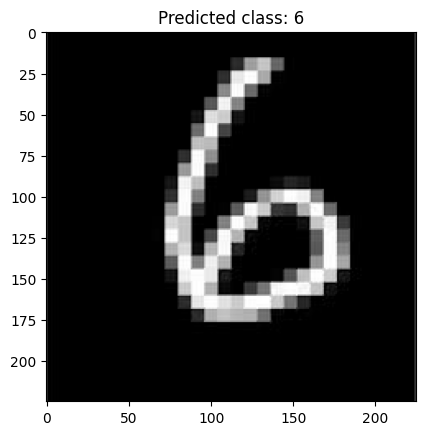

In [42]:
import matplotlib.pyplot as plt


img_path = "/content/ML_6.png"

predicted_class = test_single_img(img_path,model)

img = Image.open(img_path)
plt.imshow(img, cmap ="gray")
plt.title(f"Predicted class: {predicted_class}")
plt.show()

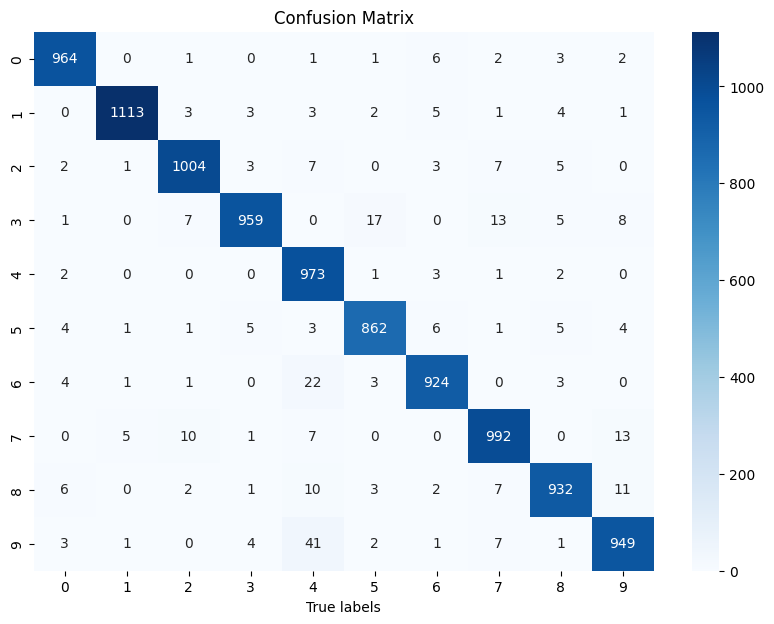

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(act_labels ,model_predicted )

plt.figure(figsize =(10,7))
sns.heatmap(cm,annot=True ,fmt ='g' ,cmap ="Blues" ,xticklabels=np.arange(10) ,yticklabels=np.arange(10))

plt.title("Confusion Matrix")
plt.xlabel("Predicted, labels")
plt.xlabel("True labels")
plt.show()


**Lenet5 Model**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.5014 - loss: 1.4234 - val_accuracy: 0.9575 - val_loss: 0.1458
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.8589 - loss: 0.4687 - val_accuracy: 0.9695 - val_loss: 0.1026
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.8936 - loss: 0.3633 - val_accuracy: 0.9738 - val_loss: 0.0900
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9178 - loss: 0.2942 - val_accuracy: 0.9761 - val_loss: 0.0801
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9219 - loss: 0.2755 - val_accuracy: 0.9785 - val_loss: 0.0727
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9308 - loss: 0.2497 - val_accuracy: 0.9774 - val_loss: 0.0784
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9355 - loss: 0.2321 - val_accuracy: 0.9764 - val_loss: 0.0767
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9373 -

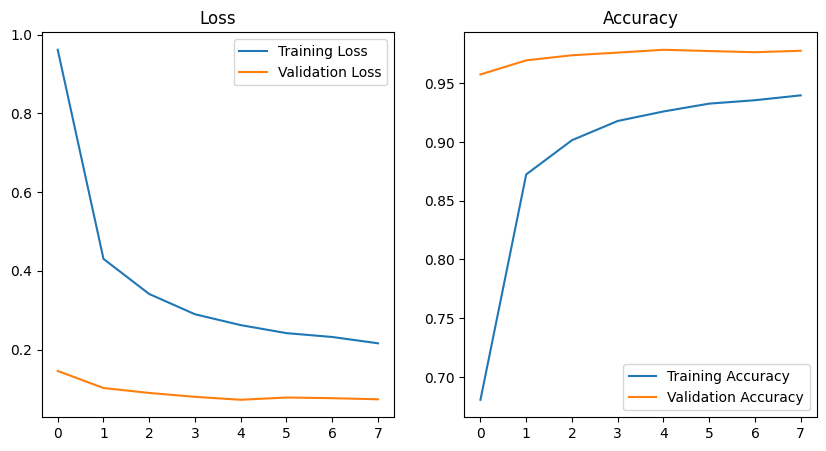

The model is well-fitted.
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9764 - loss: 0.0740
Test accuracy: 0.98


In [44]:
# Import necessary libraries
import tensorflow as tf #TensorFlow is an open-source platform for machine learning developed by Google. Used for buliding ML and DL Models.
from tensorflow import keras #Keras is a high-level deep learning API written in Python that runs on top of TensorFlow.Simplifies the creation of neural networks.
from sklearn.model_selection import train_test_split #Scikit-learn is a Python library for machine learning built on NumPy, SciPy, and matplotlib.
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the LeNet-5 model with Dropout and Data Augmentation
model = keras.models.Sequential([
    keras.layers.RandomRotation(0.1, input_shape=(28, 28, 1)),  # Data augmentation layer
    keras.layers.RandomTranslation(0.1, 0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.Conv2D(6, (5, 5), activation='relu'), #The `Conv2D` layer in Keras applies filters (small grids of numbers) to an image to detect patterns like edges, textures, or shapes, helping a neural network understand visual features.
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(16, (5, 5), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(), #The keras.layers.Flatten() layer in Keras is used to transform multi-dimensional inputs (e.g., 2D image data) into a 1D vector.
    keras.layers.Dense(120, activation='relu'), #The keras.layers.Dense layer is a fully connected layer where every neuron in the layer is connected to every neuron in the previous layer, and it is used to learn patterns and relationships in the data.


    keras.layers.Dropout(0.5),  #The Dropout layer in Keras is a regularization technique that randomly sets a fraction of input neurons to zero during training.
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dropout(0.5),  # Dropout layer
    keras.layers.Dense(10, activation='softmax') #The softmax function is a mathematical function often used in the output layer of neural networks for multi-class classification problems.
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot training and validation loss/accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) # This function is used to create multiple subplots within a single figure. The layout of the subplots is specified as (nrows, ncols, index)
plt.plot(history.history['loss'], label='Training Loss')  #This function is used to plot 2D line graphs. It takes x and y values as inputs and has many optional arguments for customization.
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend() # It is a Matplotlib function used to display a legend on a plot, which helps identify the elements of the graph.
plt.title('Loss')
# Validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

# Check underfitting/overfitting
if history.history['accuracy'][-1] < 0.7: #history.history it is a dictionary containing metrics recorded during training . history['accuracy'] refers to the accuracy values logged for the training data.
    print("The model is underfitting. Consider training for more epochs or using a larger network.")
elif history.history['val_accuracy'][-1] < history.history['accuracy'][-1] - 0.1:
    print("The model is overfitting. Consider using regularization or early stopping.")
else:
    print("The model is well-fitted.")
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test) # model.evaluate is the method used to evaluate the model.
print(f'Test accuracy: {test_acc:.2f}')

Saving ML_9.png to ML_9.png
Loading image from: ML_9.png


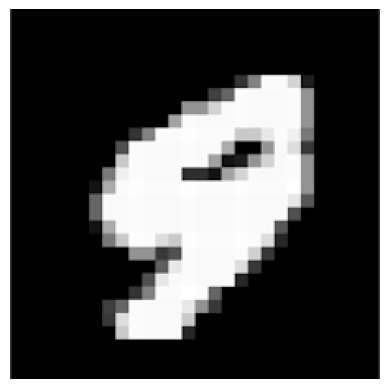

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Predicted class: 9


Saving ML_3.png to ML_3.png
Loading image from: ML_3.png


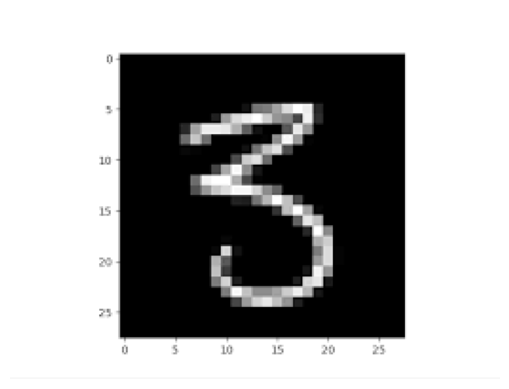

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: 0


Saving ML_4.png to ML_4.png
Loading image from: ML_4.png


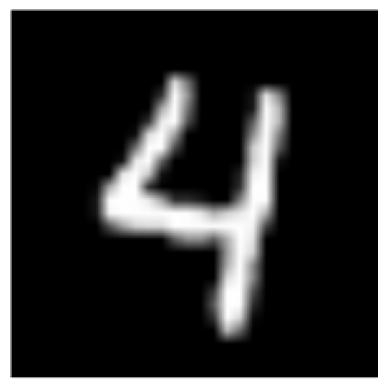

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted class: 4


In [45]:

from google.colab import files # Used to import files from computer.
import os #The os library in Python is a built-in module used to interact with the operating system. It provides functionalities for handling files, directories, and system-level operations.
import cv2 #The cv2 library, part of OpenCV, is a powerful open-source computer vision library in Python. It is used for image and video processing, including tasks like object detection, image transformations, and face recognition.
import numpy as np
import matplotlib.pyplot as plt

# Function to predict the image
def predict_image(image_path): #The function is designed to load an image, preprocess it, and possibly pass it through a machine learning model to make predictions.
    print(f"Loading image from: {image_path}")

    # Check if the file exists
    if not os.path.exists(image_path):
        print("File does not exist.")
        return

    # Load the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE Specifies that the image should be read in grayscale mode (1 channel).


    # Check if the image was loaded successfully
    if img is None:
        print("Error loading image. Please check the file format and path.")
        return

    # Display the image
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()  # Show the image

    # Resize the image
    img = cv2.resize(img, (28, 28))
    img = img.reshape(-1, 28, 28, 1).astype('float32') / 255.0

    # Make a prediction (assuming 'model' is defined)
    pred = model.predict(img)
    pred_class = np.argmax(pred, axis=1)

    # Print the prediction
    print(f'Predicted class: {pred_class[0]}')

# Upload the image
uploaded = files.upload()

# Use the uploaded filename
for filename in uploaded.keys():
    predict_image(filename)  # Call the prediction function with the uploaded filenamefrom google.colab import files
    uploaded = files.upload()

# Use the uploaded filename
for filename in uploaded.keys():
    predict_image(filename)

    uploaded = files.upload()

# Use the uploaded filename
for filename in uploaded.keys():
    predict_image(filename)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


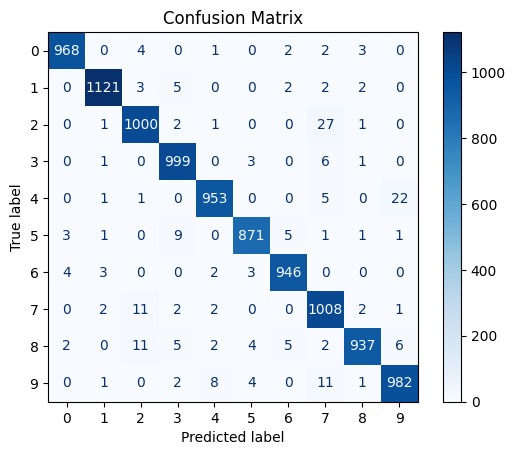

In [46]:
import numpy as np #numpy is a library for numerical computing in Python. It provides powerful tools for working with arrays and matrices.
import matplotlib.pyplot as plt # matplotlib.pyplot is used for creating visualizations like line plots, scatter plots, histograms, and more.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Sklearn  are tools from scikit-learn for evaluating classification models by comparing predicted and actual labels.
 #load_model is used if you have a pre-trained TensorFlow model that you want to use for predictions or evaluation.
from tensorflow.keras.models import load_model  # load_model is used if you have a pre-trained TensorFlow model that you want to use for predictions or evaluation.


# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # ConfusionMatrixDisplay  provides a clean and convenient way to visualize confusion matrices with labels and formatting, making it easier to interpret model performance.
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()